In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('temp change.xlsx')
df.head()

,Year,Temp Change
0,1961,-0.218
1,1962,-0.492
2,1963,-0.021
3,1964,-0.032
4,1965,-0.074


In [3]:
df['Year'] = pd.to_datetime(df['Year'],format = '%Y')
df.head()

,Year,Temp Change
0,1961-01-01,-0.218
1,1962-01-01,-0.492
2,1963-01-01,-0.021
3,1964-01-01,-0.032
4,1965-01-01,-0.074


In [4]:
df.set_index('Year',inplace=True)
df.head()

,Temp Change
Year,
1961-01-01,-0.218
1962-01-01,-0.492
1963-01-01,-0.021
1964-01-01,-0.032
1965-01-01,-0.074


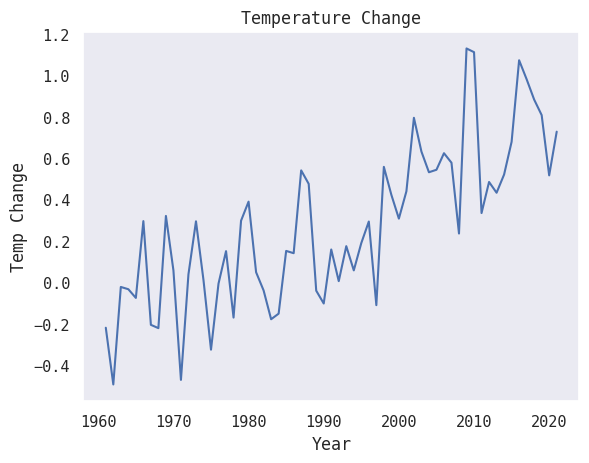

In [5]:
sns.set_theme(style = 'dark',font = 'monospace')
sns.lineplot(x = df.index,y=df['Temp Change']).set(title='Temperature Change')
plt.savefig('tempchange.png', dpi=300, bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

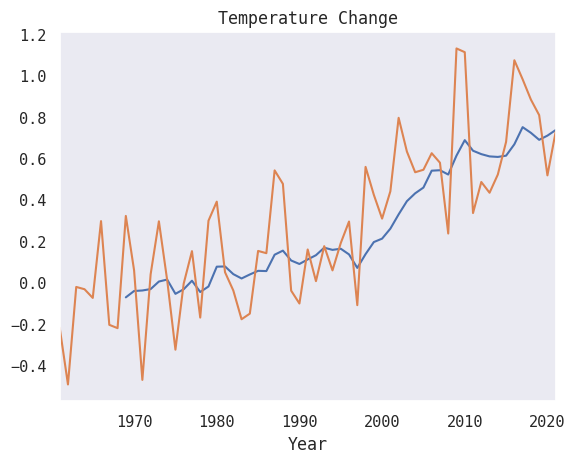

In [6]:
timeseries = df['Temp Change']
timeseries.rolling(9).mean().plot(label='9 year Rolling Mean').set(title = 'Temperature Change')
#timeseries.rolling(9).std().plot(label='9 year Rolling Std')
timeseries.plot()
plt.legend
plt.savefig('tempchange1.png', dpi=300, bbox_inches='tight')
plt.show

<Figure size 640x480 with 0 Axes>

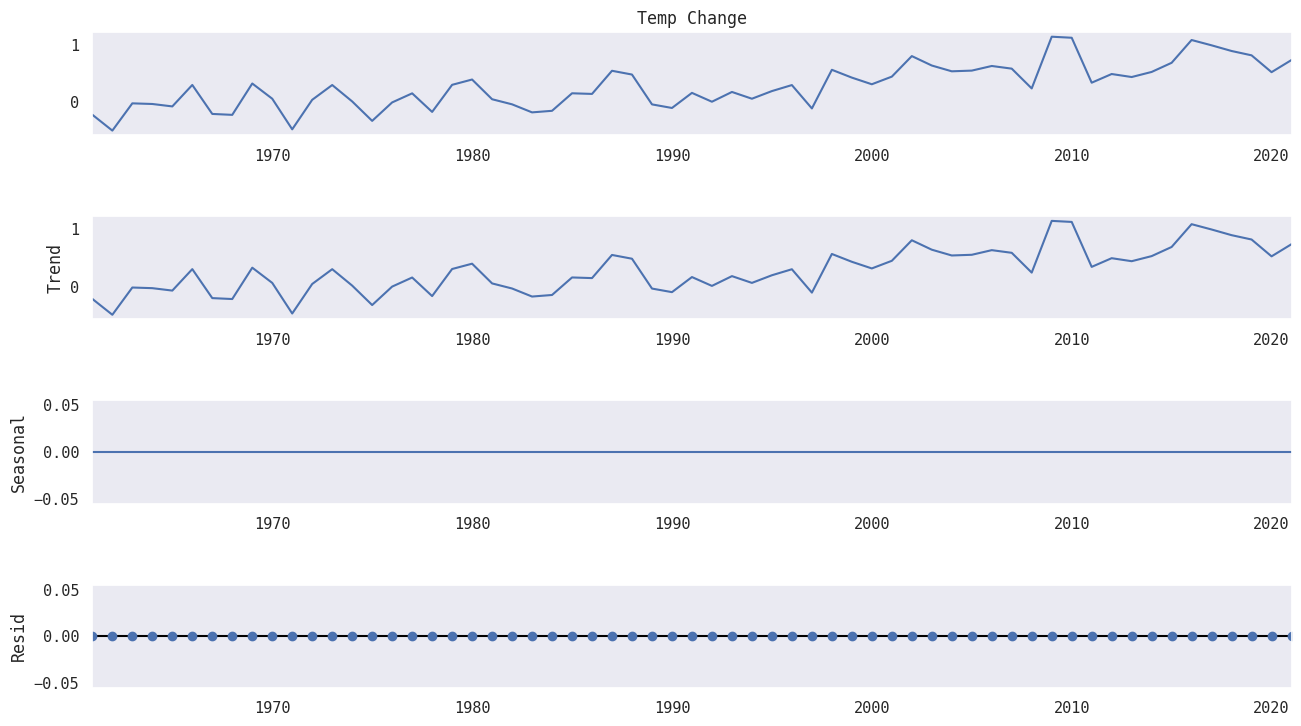

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Temp Change'], period=1)
figure = plt.figure()
figure = decomposition.plot()
figure.set_size_inches(15, 8)

In [8]:
model = sm.tsa.statespace.SARIMAX(df['Temp Change'],order=(0,1,0), seasonal_order=(2,2,1,6))
ARIMAresult = model.fit()
print (ARIMAresult.summary())

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01720D-01    |proj g|=  9.59893D-02

At iterate    5    f=  5.98581D-01    |proj g|=  4.25245D-02

At iterate   10    f=  5.44226D-01    |proj g|=  4.51951D-01

At iterate   15    f=  5.26338D-01    |proj g|=  7.56821D-02

At iterate   20    f=  5.22817D-01    |proj g|=  7.12577D-03

At iterate   25    f=  5.22588D-01    |proj g|=  2.10970D-03

At iterate   30    f=  5.22554D-01    |proj g|=  9.58000D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<AxesSubplot:xlabel='Year'>

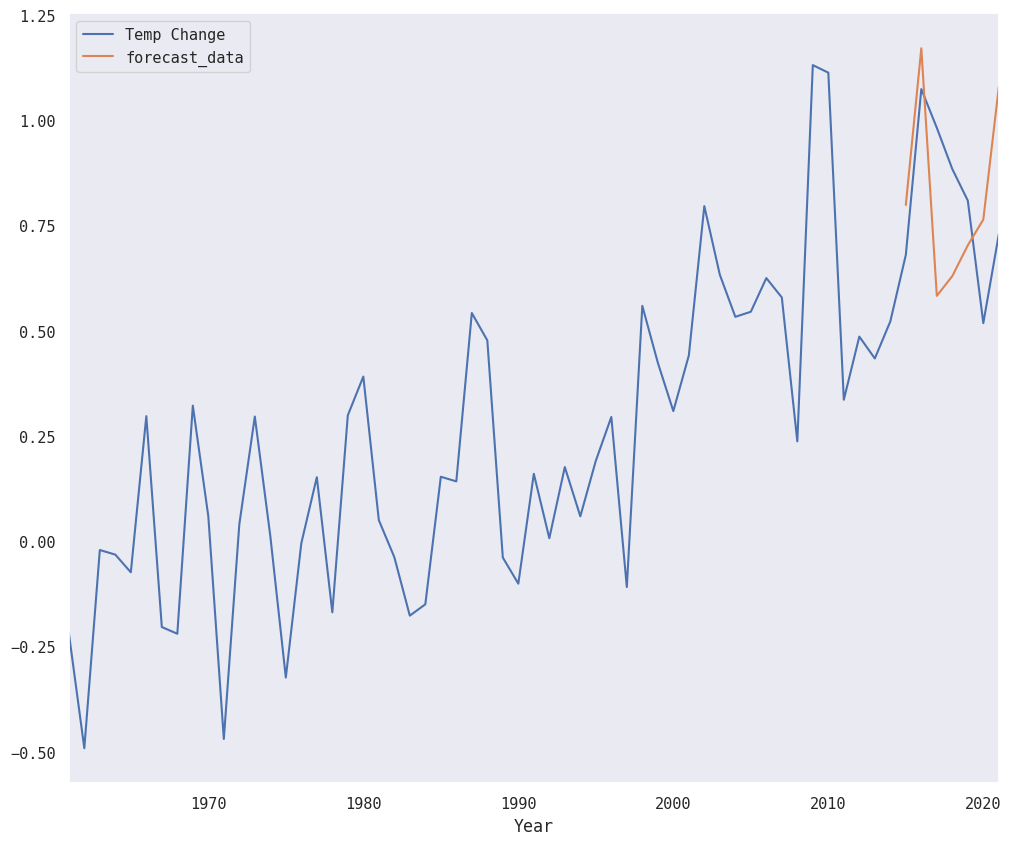

In [9]:
df['forecast_data'] = ARIMAresult.predict(start = '2015-01-01' , end= '2100-01-01', dynamic= True)
df[['Temp Change','forecast_data']].plot (figsize= (12,10))

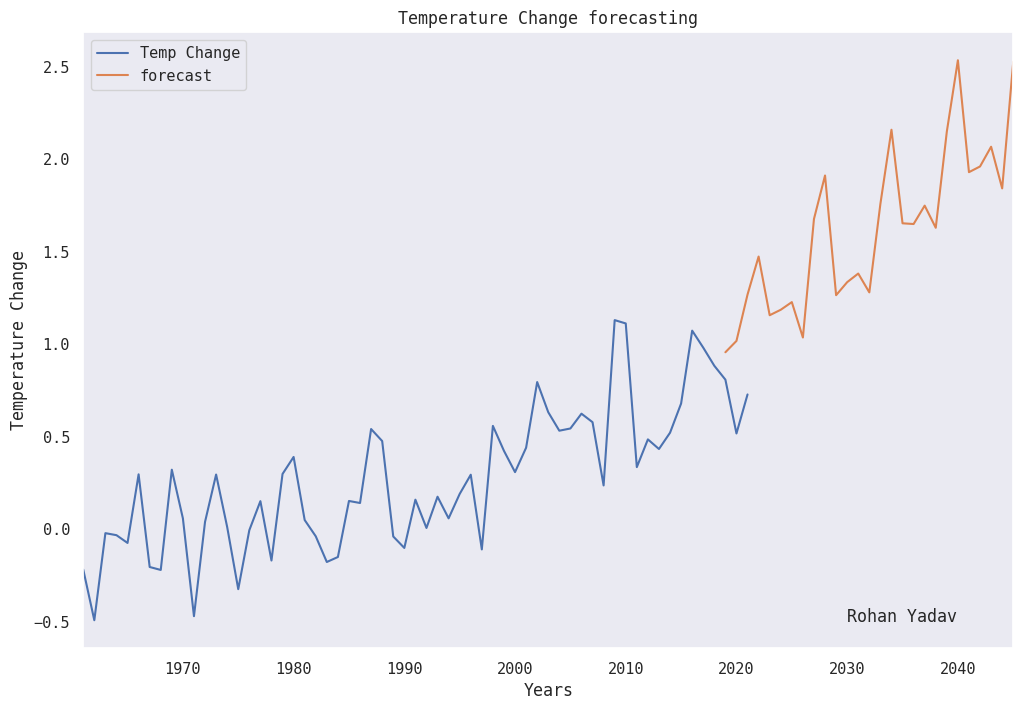

In [12]:
from pandas.tseries.offsets import DateOffset 
future_dates=[df.index[-1]+ DateOffset(years=x) for x in range(0,25)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = ARIMAresult.predict(start = '2019-01-01', end = '2100-01-01', dynamic= True)
future_df[['Temp Change', 'forecast']].plot(figsize=(12, 8)).set(title='Temperature Change forecasting')
plt.xlabel("Years")
plt.ylabel("Temperature Change")
plt.text("2030",-0.5,"Rohan Yadav")
plt.savefig('tempchangeforcast.png', dpi=300, bbox_inches='tight')
plt.show()